In [60]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

In [61]:
heritability_data= {'1': 0.1,
'2': 0.3,
'3': 0.5,
'4': 0.7,
'5': 0.9}

optima_dict = {'optima6': 6,
               'optima5': 5,
               'optima4': 4,
               'optima3': 3,
               'optima2': 2,
               'optima1.5': 1.5,
               'optima1': 1,
               'optima0': 0}

def get_params(df):
    df = df.reset_index()
    df['subp'] = df['index'].str.split('/subp').str[1].str[0]

    df['index'] = df['index'].str.split('/subp').str[0]
    df['optima'] = df['index'].str.split('/').str[-1]
    df['sel'] = df['index'].str.split('/').str[-2]
    df['h2'] = df['index'].str.split('/').str[-3]
    df['poly'] = df['index'].str.split('_').str[-2]
    df['rep'] = df['index'].str.split('_').str[-1].str.split('/').str[0]
    df = df.drop('index',axis=1)
    return df

In [49]:
palette = sns.color_palette("viridis", 3)
h1_levels = [0.1, 0.5, 0.9]

In [50]:
path = '/home/tbellagio/scratch/to_transfer/'

va_ve= pd.read_csv(path + 'va_ve_stsc.csv', index_col=[0])

ve = va_ve[va_ve['Unnamed: 1'] == 1]
va = va_ve[va_ve['Unnamed: 1'] == 0]

In [51]:
va

,Unnamed: 1,0,1,2,3,4,5,6,7,8,9
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi1000_14/3/estrongsel/optima3/subp4_va.txt,0,834.4820,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi1000_14/3/estrongsel/optima3/subp2_va.txt,0,834.4820,3.2672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi1000_14/3/estrongsel/optima3/subp1_va.txt,0,834.4820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi1000_14/3/estrongsel/optima3/subp3_va.txt,0,834.4820,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi1000_14/3/estrongsel/optima3/subp5_va.txt,0,834.4820,48.1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi50_15/1/estrongsel/optima1/subp4_va.txt,0,26.3868,23.2599,26.6128,33.6154,35.1439,42.91430,32.77340,9.67903,2.96694,2.71712
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi50_15/1/estrongsel/optima1/subp2_va.txt,0,26.3868,29.0088,30.7633,33.9680,39.1514,27.97210,20.62230,8.59990,9.67540,9.10643
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi50_15/1/estrongsel/optima1/subp1_va.txt,0,26.3868,24.8697,22.7470,23.3279,19.7244,17.75020,8.66367,16.50240,16.70960,18.22910
/home/tbellagi/bigscratch/st_sc/slim_grenenet/results/arq_pi50_15/1/estrongsel/optima1/subp3_va.txt,0,26.3868,23.2750,21.1439,16.2033,15.1779,14.60650,9.50247,4.40214,NaN,NaN


In [52]:
ve = ve['0']

In [53]:
for i in va.columns:
    va[i] =  va[i] / (va[i] + ve )

/tmp/ipykernel_72809/2752466154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  va[i] =  va[i] / (va[i] + ve )


In [54]:
va = get_params(va)

In [55]:
va['optima'].value_counts()

optima3      5400
optima5      5400
optima4      5400
optima6      5400
optima0      5400
optima2      5400
optima1.5    5400
optima1      5400
Name: optima, dtype: int64

In [56]:
poly_levels = [1, 5, 20, 50, 100, 500, 1000]
poly_levels_colors = sns.color_palette("viridis", n_colors=len(poly_levels))


In [57]:
va['poly'].unique()

array(['pi1000', 'pi100', 'pi50', 'pi1', 'pi500', 'pi20', 'pi10', 'pi2',
       'pi5'], dtype=object)

In [58]:
va['poly'] = va['poly'].str.replace('pi', '').astype(int)

In [74]:
close_optima = ['optima1', 'optima1.5', 'optima2', 'optima3']
far_optima = ['optima4', 'optima5', 'optima6']

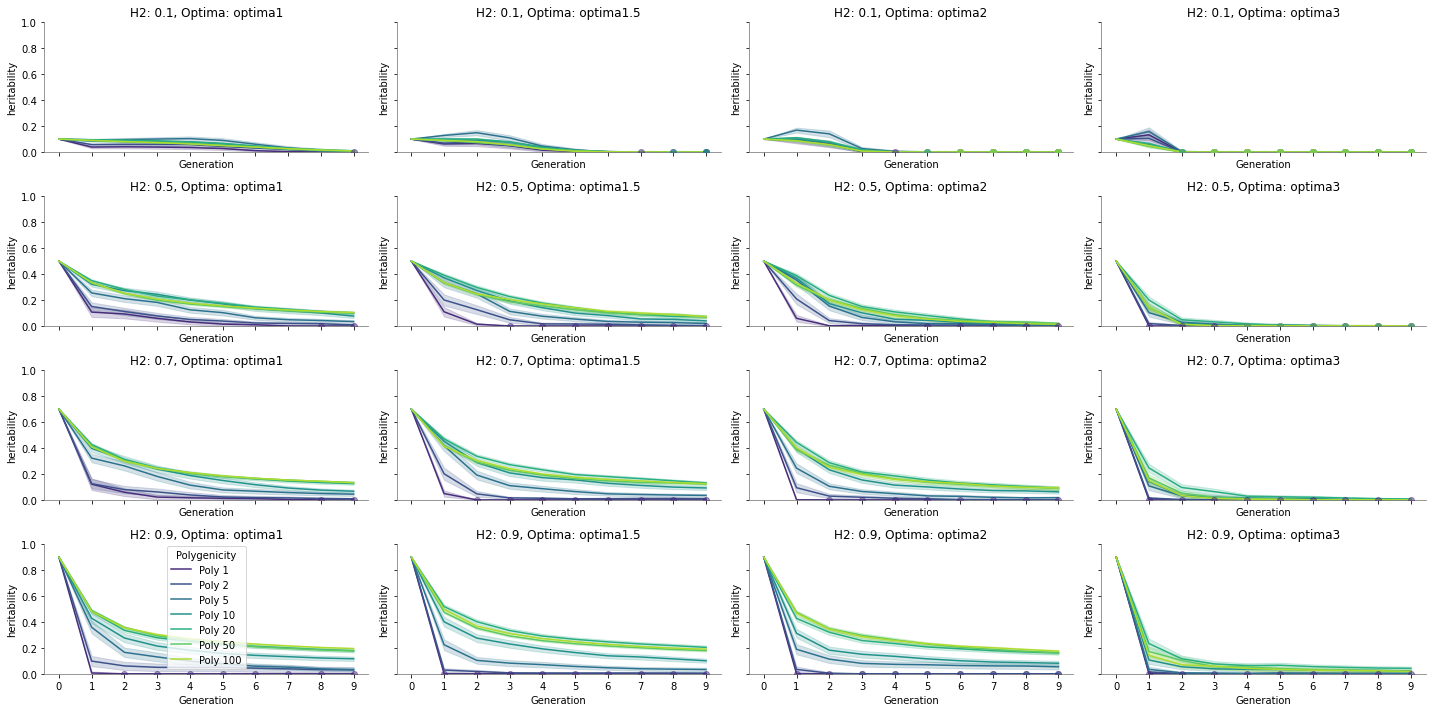

In [75]:
y_lim_min = 0
y_lim_max = 1
metric_name = 'heritability'

va.loc[:, 'h2'] = va['h2'].replace(heritability_data)

df = va.copy()

h2_levels = sorted(df['h2'].unique())#heritability_data.values()
optima_levels = close_optima#optima_dict.values()
poly_levels = sorted(df['poly'].unique())#poligenicity_data.values()

df = df.fillna(0)

fig, axs = plt.subplots(len(h2_levels), len(optima_levels), figsize=(20, 10), sharex=True, sharey=True)

# Handling the 1D array case for axs
if len(h2_levels) == 1:
    axs = np.array([axs])
if len(optima_levels) == 1:
    axs = np.array([axs]).T

for i, h2 in enumerate(h2_levels):
    for j, optima in enumerate(optima_levels):
        ax = axs[i, j] if len(h2_levels) > 1 and len(optima_levels) > 1 else axs[max(i, j)]
        subset_df = df[df['h2'] == h2]

        for poly,color in zip(poly_levels, poly_levels_colors):
            poly_subset = subset_df[(subset_df['optima'] == optima) & (subset_df['poly'] == poly)]
            generations = list(map(str, range(10)))

            # Calculate mean and SEM (Standard Error of the Mean) for each generation
            means = poly_subset[generations].mean()
            sems = poly_subset[generations].sem()

            # Calculate the confidence intervals
            ci = 1.96 * sems  # 95% confidence interval, adjust the multiplier as needed for different confidence levels

            # Plotting the mean population size per generation
            ax.plot(generations, means, label=f'Poly {poly}', color = color)

            # Adding the confidence interval as a shaded area
            ax.fill_between(generations, (means - ci), (means + ci), alpha=0.2, color = color)
            # Markers for zero values
            zero_indices = means[means == 0].index
            if not zero_indices.empty:
                ax.scatter(zero_indices, [0]*len(zero_indices), color=color, zorder=9, alpha=0.5)

        #ax.axhline(0, color='grey', linestyle='-', linewidth=1)
        #ax.axvline(0, color='grey', linestyle='-', linewidth=1)

        ax.set_ylim(y_lim_min, y_lim_max)  # Adjust 100 to your desired maximum y-value
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('grey')
        ax.spines['left'].set_color('grey')
        ax.set_title(f'H2: {h2}, Optima: {optima}')
        ax.set_xlabel('Generation')
        ax.set_ylabel(metric_name)
        if i == len(h2_levels) - 1 and j == 0:
            ax.legend(title='Polygenicity')

plt.tight_layout()

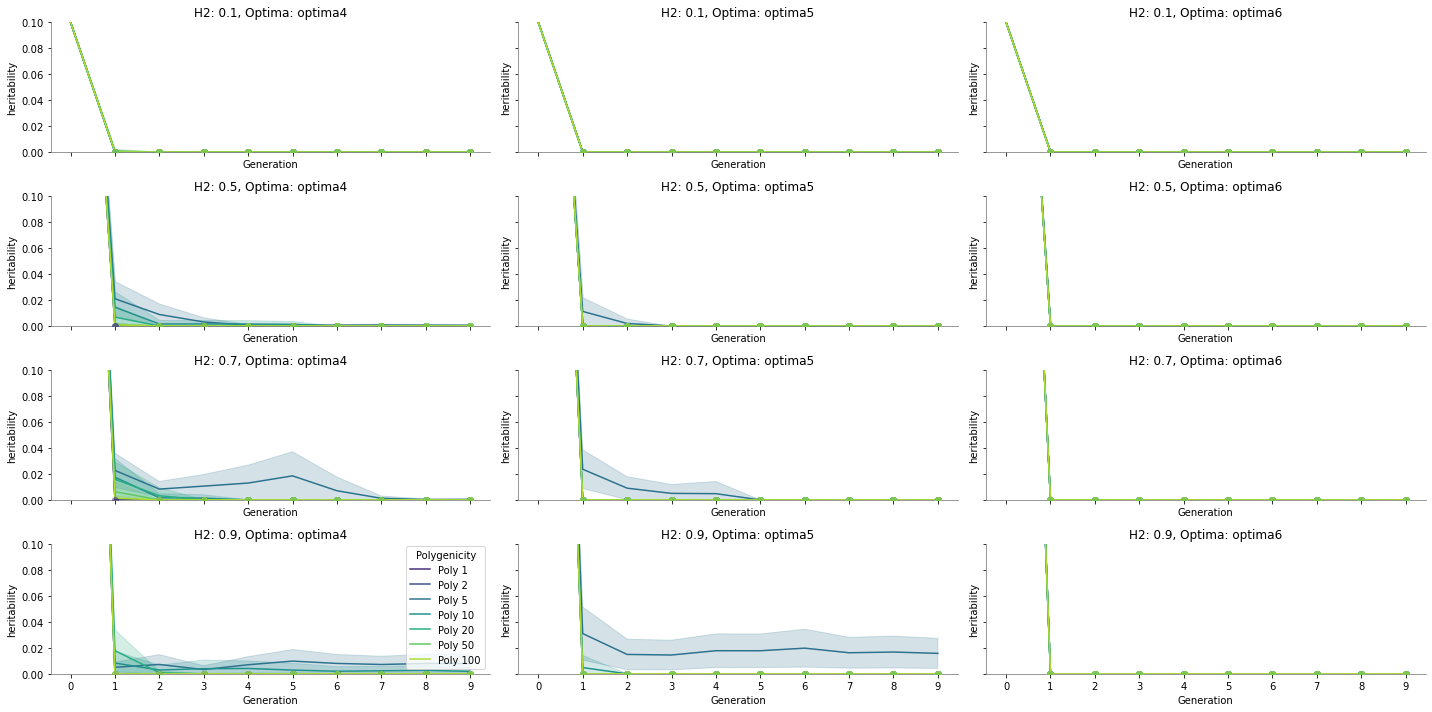

In [73]:
y_lim_min = 0
y_lim_max = 0.1
metric_name = 'heritability'

va.loc[:, 'h2'] = va['h2'].replace(heritability_data)

df = va.copy()

h2_levels = sorted(df['h2'].unique())#heritability_data.values()
optima_levels = far_optima #optima_dict.values()
poly_levels = sorted(df['poly'].unique())#poligenicity_data.values()

df = df.fillna(0)

fig, axs = plt.subplots(len(h2_levels), len(optima_levels), figsize=(20, 10), sharex=True, sharey=True)

# Handling the 1D array case for axs
if len(h2_levels) == 1:
    axs = np.array([axs])
if len(optima_levels) == 1:
    axs = np.array([axs]).T

for i, h2 in enumerate(h2_levels):
    for j, optima in enumerate(optima_levels):
        ax = axs[i, j] if len(h2_levels) > 1 and len(optima_levels) > 1 else axs[max(i, j)]
        subset_df = df[df['h2'] == h2]

        for poly,color in zip(poly_levels, poly_levels_colors):
            poly_subset = subset_df[(subset_df['optima'] == optima) & (subset_df['poly'] == poly)]
            generations = list(map(str, range(10)))

            # Calculate mean and SEM (Standard Error of the Mean) for each generation
            means = poly_subset[generations].mean()
            sems = poly_subset[generations].sem()

            # Calculate the confidence intervals
            ci = 1.96 * sems  # 95% confidence interval, adjust the multiplier as needed for different confidence levels

            # Plotting the mean population size per generation
            ax.plot(generations, means, label=f'Poly {poly}', color = color)

            # Adding the confidence interval as a shaded area
            ax.fill_between(generations, (means - ci), (means + ci), alpha=0.2, color = color)
            # Markers for zero values
            zero_indices = means[means == 0].index
            if not zero_indices.empty:
                ax.scatter(zero_indices, [0]*len(zero_indices), color=color, zorder=9, alpha=0.5)

        #ax.axhline(0, color='grey', linestyle='-', linewidth=1)
        #ax.axvline(0, color='grey', linestyle='-', linewidth=1)

        ax.set_ylim(y_lim_min, y_lim_max)  # Adjust 100 to your desired maximum y-value
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('grey')
        ax.spines['left'].set_color('grey')
        ax.set_title(f'H2: {h2}, Optima: {optima}')
        ax.set_xlabel('Generation')
        ax.set_ylabel(metric_name)
        if i == len(h2_levels) - 1 and j == 0:
            ax.legend(title='Polygenicity')

plt.tight_layout()


In [ ]:
y_lim_min = 0
y_lim_max = 1
metric_name = 'heritability'

va.loc[:, 'h2'] = va['h2'].replace(heritability_data)

df = va.copy()

h2_levels = sorted(df['h2'].unique())#heritability_data.values()
optima_levels = close_optima#optima_dict.values()
poly_levels = sorted(df['poly'].unique())#poligenicity_data.values()

df = df.fillna(0)

fig, axs = plt.subplots(len(h2_levels), len(optima_levels), figsize=(20, 10), sharex=True, sharey=True)

# Handling the 1D array case for axs
if len(h2_levels) == 1:
    axs = np.array([axs])
if len(optima_levels) == 1:
    axs = np.array([axs]).T

for i, h2 in enumerate(h2_levels):
    for j, optima in enumerate(optima_levels):
        ax = axs[i, j] if len(h2_levels) > 1 and len(optima_levels) > 1 else axs[max(i, j)]
        subset_df = df[df['h2'] == h2]

        for poly,color in zip(poly_levels, poly_levels_colors):
            poly_subset = subset_df[(subset_df['optima'] == optima) & (subset_df['poly'] == poly)]
            generations = list(map(str, range(10)))

            # Calculate mean and SEM (Standard Error of the Mean) for each generation
            means = poly_subset[generations].mean()
            sems = poly_subset[generations].sem()

            # Calculate the confidence intervals
            ci = 1.96 * sems  # 95% confidence interval, adjust the multiplier as needed for different confidence levels

            # Plotting the mean population size per generation
            ax.plot(generations, means, label=f'Poly {poly}', color = color)

            # Adding the confidence interval as a shaded area
            ax.fill_between(generations, (means - ci), (means + ci), alpha=0.2, color = color)
            # Markers for zero values
            zero_indices = means[means == 0].index
            if not zero_indices.empty:
                ax.scatter(zero_indices, [0]*len(zero_indices), color=color, zorder=9, alpha=0.5)

        #ax.axhline(0, color='grey', linestyle='-', linewidth=1)
        #ax.axvline(0, color='grey', linestyle='-', linewidth=1)

        ax.set_ylim(y_lim_min, y_lim_max)  # Adjust 100 to your desired maximum y-value
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('grey')
        ax.spines['left'].set_color('grey')
        ax.set_title(f'H2: {h2}, Optima: {optima}')
        ax.set_xlabel('Generation')
        ax.set_ylabel(metric_name)
        if i == len(h2_levels) - 1 and j == 0:
            ax.legend(title='Polygenicity')

plt.tight_layout()